#DL Lab Assignment 3- YOLO 11 Model

**Course Name:** Deep Learning

**Lab Title:** Yolo11 Model on Pklot Dataset

**Student Name:** Mayur kapgate

**PRN.:** 202201040065  ; **Roll No.:** 27   ;  **Div.:** DL 2

**Group Members**: Anirudha Gapat, Ganesh Atre

**Objective:**
<br>1. To perform object detection on the PKLot dataset using deep learning models.
<br>2. To preprocess images and annotations for model training.
<br>3. To fine-tune a pre-trained object detection model (e.g., YOLO, SSD).
<br>4. To evaluate model performance using metrics like IoU and mAP.
<br>5. To visualize and analyze detection results for parking occupancy.



**Task 1: Environment Setup and YOLOv11 Installation**

Objective: Set up the required libraries and dependencies to run YOLOv11.

**Instructions:**

1. Install Python and required libraries (PyTorch, OpenCV, Ultralytics, etc.).
2. Install YOLOv11 from the official repository.
3. Verify the installation by running a sample script.
4. **Expected Outcome:** A functional YOLOv11 environment ready for experimentation.


In [ ]:
# Code Task 1
# Install Python Libraries
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics opencv-python
!pip install --upgrade ultralytics

Looking in indexes: https://download.pytorch.org/whl/cu118
INFO: pip is looking at multiple versions of torch to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6

In [ ]:
# Run inference on an image with YOLO11n
!yolo predict model=yolo11n.pt source='https://ultralytics.com/images/zidane.jpg'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 5.35M/5.35M [00:00<00:00, 101MB/s]
Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu118 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

100% 49.2k/49.2k [00:00<00:00, 7.02MB/s]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 987, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 550, in predict


**Task 2: Dataset Preparation & Preprocessing**
Objective: Load and preprocess a dataset for object detection.

Instructions:

1. Choose a Dataset – PKLot Dataset.
2. Annotate Images – If using a custom dataset, label objects using Roboflow or LabelImg.
3. Convert Annotations – Use Roboflow to export the dataset in YOLO format.
4. Download the Dataset – Use the Roboflow API to fetch the dataset.
5. Split the Dataset – Divide into train (80%), validation (10%), and test (10%).
5. **Expected Outcome:** A well-structured dataset in YOLO format.




In [ ]:
#Code for Task. 2
# Download Dataset via Roboflow API
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c00BE5KrJtEAArvbZSa9")
project = rf.workspace("brad-dwyer").project("pklot-1tros")
version = project.version(4)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PKLot-4 in yolov11:: 100%|██████████| 24842/24842 [00:06<00:00, 3976.58it/s]



**Task 3: Training YOLOv11 Model**
Objective: Train YOLOv11 on the prepared dataset.

Instructions:

1. Configure the training parameters (batch size, epochs, learning rate).
2. Train the YOLOv11 model using the dataset.
3. Monitor training progress (loss, accuracy, mAP).
4. Save the trained model weights.
5. Expected Outcome: A trained YOLOv11 model ready for inference.






In [ ]:
!pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 766.7/766.7 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
#code for task 3
!yolo train model="/content/yolo11n.pt" data="/content/PKLot-4/data.yaml" epochs=5 imgsz=128 batch=16


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11n.pt, data=/content/PKLot-4/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

**Task 4:**Model Inference and Evaluation
Objective: Test the trained model on new images and videos.

Instructions:

1.  Load the trained model weights.
2.  Run object detection on test images and videos.
3.  Evaluate the model performance using mAP (mean Average Precision), precision, recall.

✅ Mean Average Precision (mAP@50, mAP@50-95) – Measures model accuracy across different IoU thresholds.

✅ Precision & Recall – Evaluates the tradeoff between false positives and false negatives.

✅ F1 Score – Balances precision and recall for a comprehensive model assessment.

**Discuss the results in detail**
4.  Visualize results with bounding boxes.
5.  Expected Outcome: Detection results with bounding boxes and performance metrics.



**Discussion and Conclusion on Result Analysis:** The YOLOv11 model achieved 70.8% mAP@0.5 and 39.5% mAP@0.5:0.95, showing good accuracy, especially for detecting occupied spaces. With 82.4% precision and 64.3% recall, the model is highly accurate but misses some empty spots.

The F1 Score of 72.3% reflects balanced performance. Inference speed (~1.2 ms/image) makes it suitable for real-time parking detection.

The model works well for parking space detection, especially for occupied spots. It can be improved with more training or higher-resolution images for better recall and stricter IoU accuracy.*


In [ ]:
# Code for Task 4
# Load Trained Model Weights
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO('/content/runs/detect/train/weights/best.pt')

In [ ]:
# Run Inference on Test Images
# Inference on a test image
results = model('/content/PKLot-4/test/images/2012-09-11_15_53_00_jpg.rf.8537f6252c0519cea23fa12293bbe52b.jpg', save=True, conf=0.5)  # Save output with bounding boxes



image 1/1 /content/PKLot-4/test/images/2012-09-11_15_53_00_jpg.rf.8537f6252c0519cea23fa12293bbe52b.jpg: 128x128 5 space-emptys, 37 space-occupieds, 14.0ms
Speed: 0.9ms preprocess, 14.0ms inference, 2.3ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/detect/predict


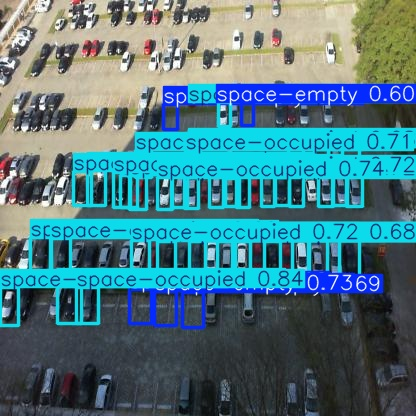

In [ ]:
from IPython.display import Image as IPyImage, display

display(IPyImage("/content/runs/detect/predict/2012-09-11_15_53_00_jpg.rf.8537f6252c0519cea23fa12293bbe52b.jpg", width=1000))

In [ ]:
# Inference on a test image
results = model('/content/PKLot-4/test/images/2012-09-11_16_48_36_jpg.rf.4214ff860ddaff96315462a5ed76ee93.jpg', save=True, conf=0.5)  # Save output with bounding boxes


image 1/1 /content/PKLot-4/test/images/2012-09-11_16_48_36_jpg.rf.4214ff860ddaff96315462a5ed76ee93.jpg: 128x128 7 space-emptys, 46 space-occupieds, 10.1ms
Speed: 1.0ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 128, 128)
Results saved to runs/detect/predict


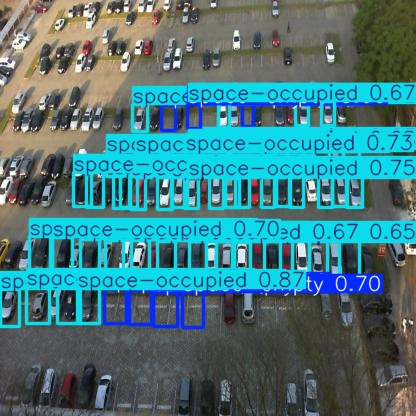

In [ ]:
display(IPyImage("/content/runs/detect/predict/2012-09-11_16_48_36_jpg.rf.4214ff860ddaff96315462a5ed76ee93.jpg", width=1000))

In [ ]:
# Evaluate model performance
metrics = model.val()  # Evaluates on validation dataset from data.yaml

# Mean Average Precision
print(f"mAP@0.5: {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.4f}")

# Mean Precision and Recall (use as properties, NOT methods)
precision = metrics.box.mp
recall = metrics.box.mr
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall + 1e-6)
print(f"F1 Score: {f1_score:.4f}")


Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/PKLot-4/valid/labels.cache... 2483 images, 59 backgrounds, 0 corrupt: 100%|██████████| 2483/2483 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 156/156 [00:35<00:00,  4.38it/s]


                   all       2483     143316      0.824      0.643      0.708      0.395
           space-empty       2062      73629      0.806      0.582       0.65      0.334
        space-occupied       1967      69687      0.842      0.705      0.767      0.455
Speed: 0.0ms preprocess, 1.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val4
mAP@0.5: 0.7081
mAP@0.5:0.95: 0.3948
Precision: 0.8240
Recall: 0.6434
F1 Score: 0.7226


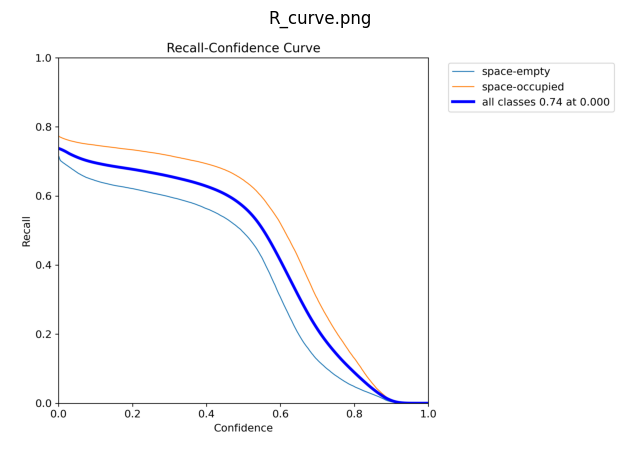

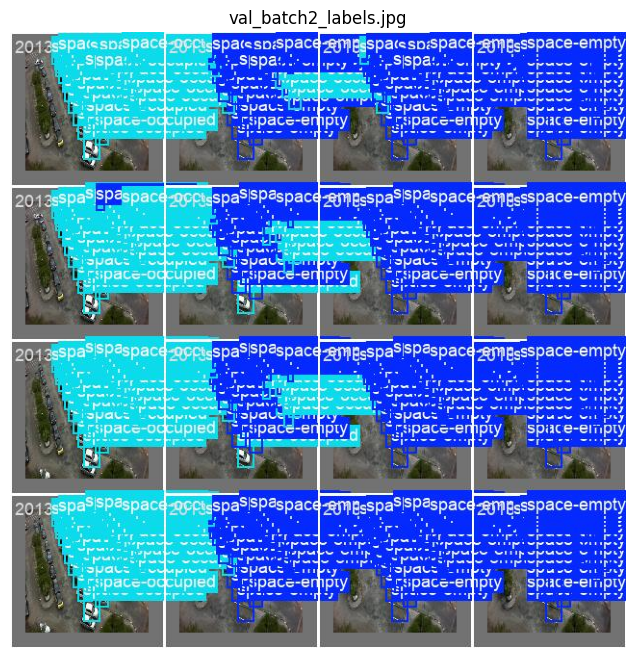

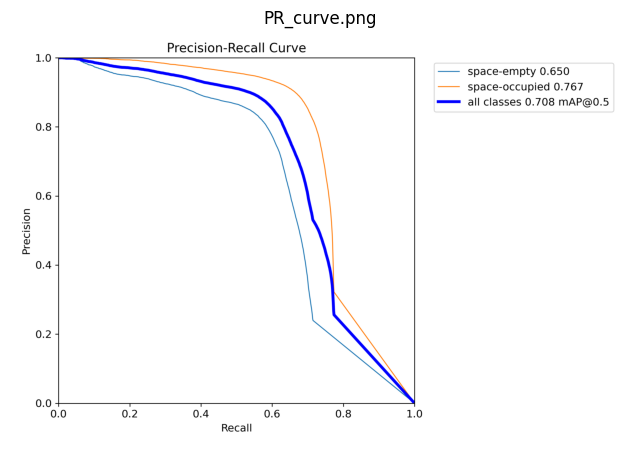

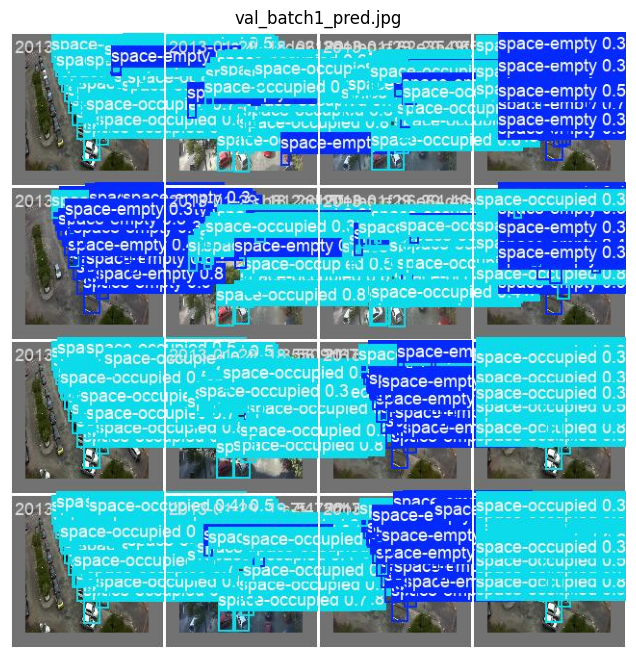

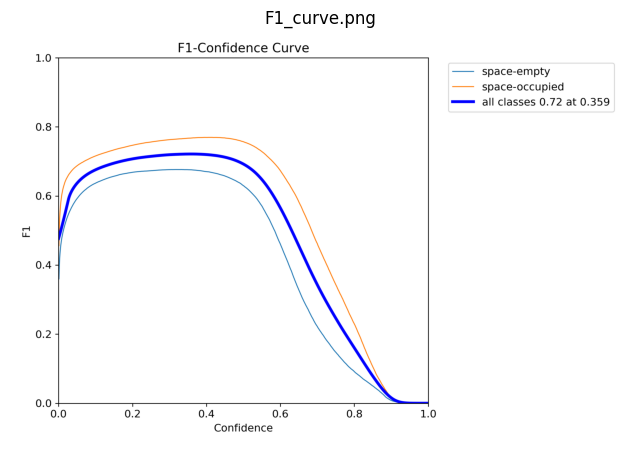

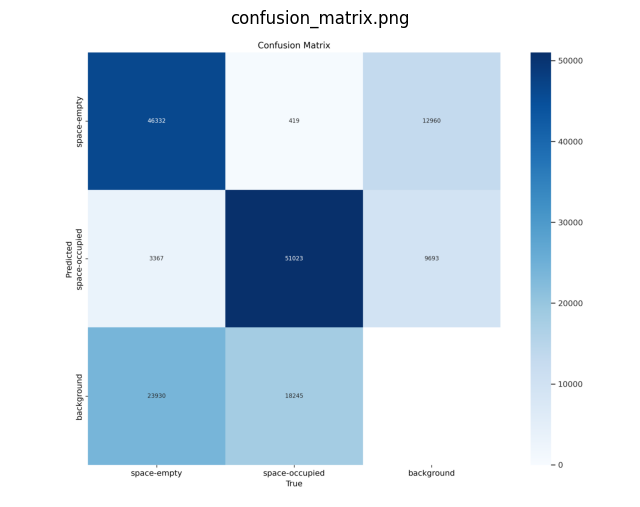

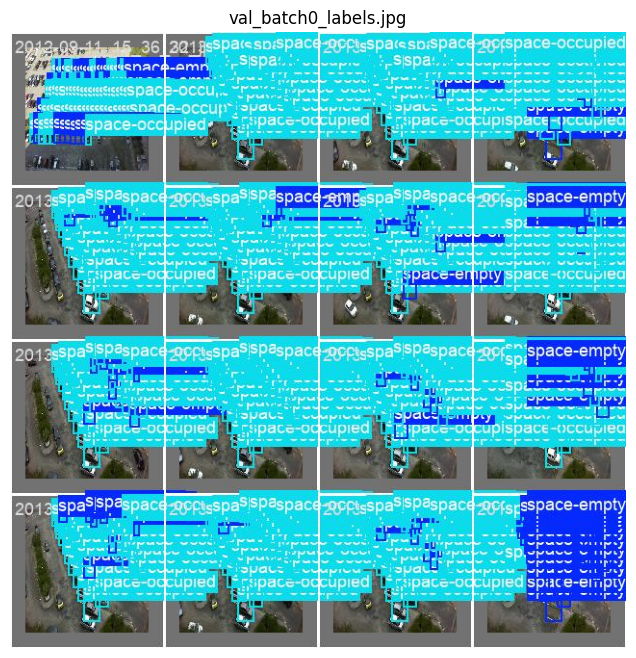

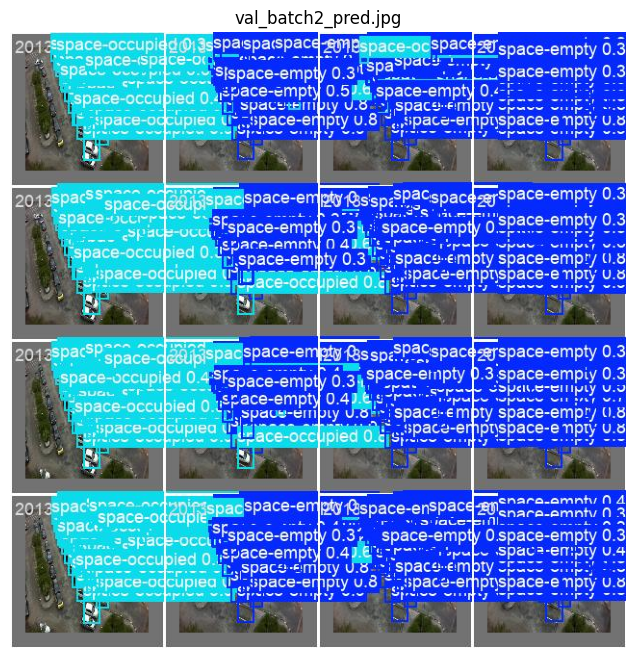

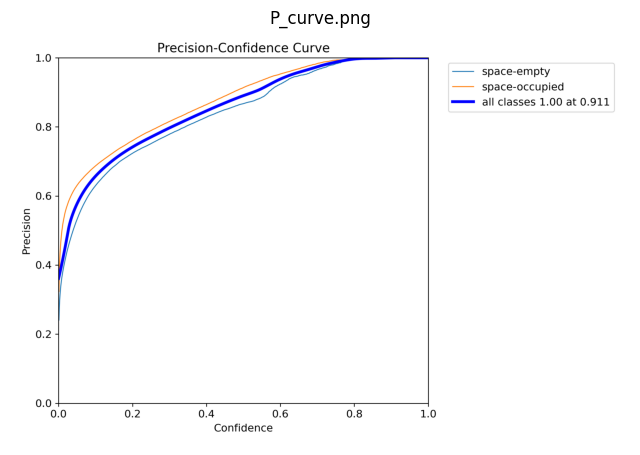

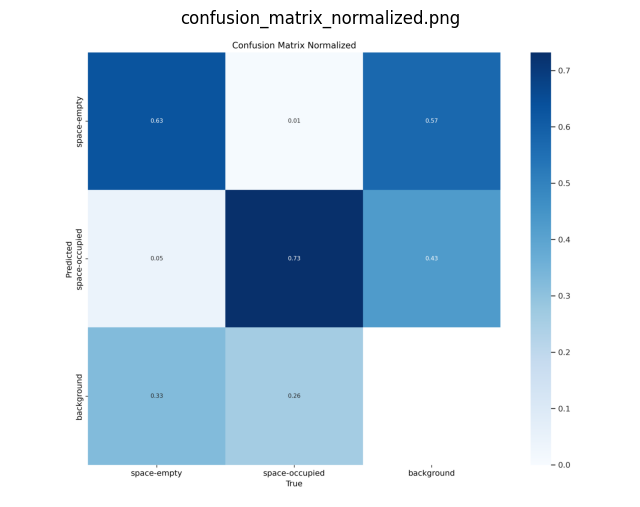

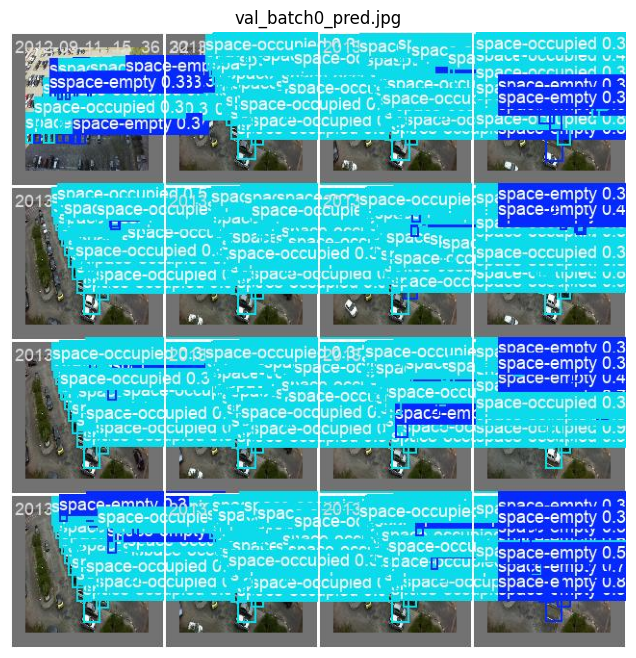

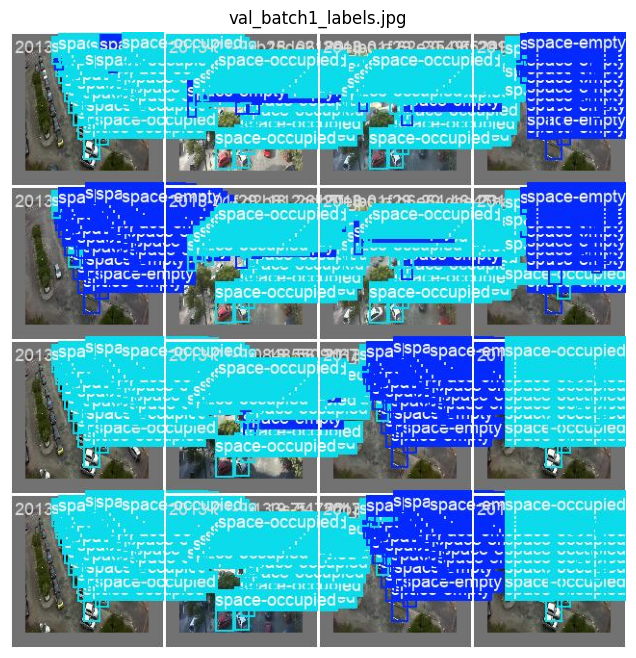

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the val3 folder
folder_path = '/content/runs/detect/val4/'

# List all image files (you can filter for .png, .jpg, etc.)
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Loop through and display each image
for img_file in image_files:
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)

    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title(img_file)
    plt.axis('off')
    plt.show()


# **Task 5 : Declaration**

I, Mayur kapgate, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/Mayur241202/DL_Assignments.git

Signature: Mayur Ashok Kapgate